In [21]:
pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\EQUIPO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\EQUIPO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [24]:
eda_df = pd.read_csv("./Raw_data/eda_datasets/eda_structuring/eda_structuring_with_python_dataset1.csv")
eda_df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [25]:
eda_df["date"] = pd.to_datetime(eda_df["date"])

In [26]:
eda_df.shape

(3401012, 3)

In [27]:
eda_df_unique = eda_df.drop_duplicates()
eda_df_unique.shape

(3401012, 3)

In [28]:
eda_df.sort_values(by = "number_of_strikes", ascending= False).head(15)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [29]:
eda_df["center_point_geom"].value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

In [30]:
eda_df["center_point_geom"].value_counts()[:20].rename_axis("unique_values").reset_index(name="Counts").style.background_gradient(cmap="Reds")

,unique_values,Counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


In [31]:
eda_df["week"] = eda_df["date"].dt.isocalendar().week
eda_df.head()

,date,number_of_strikes,center_point_geom,week
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [32]:
eda_df["day_name"] = eda_df["date"].dt.day_name()
eda_df.head()

,date,number_of_strikes,center_point_geom,week,day_name
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [33]:
# Check the mean number of strikes by week day

str_by_day = eda_df.groupby("day_name", as_index = False)["number_of_strikes"].mean()
str_by_day

,day_name,number_of_strikes
0,Friday,13.349972
1,Monday,13.152804
2,Saturday,12.732694
3,Sunday,12.324717
4,Thursday,13.240594
5,Tuesday,13.813599
6,Wednesday,13.224568


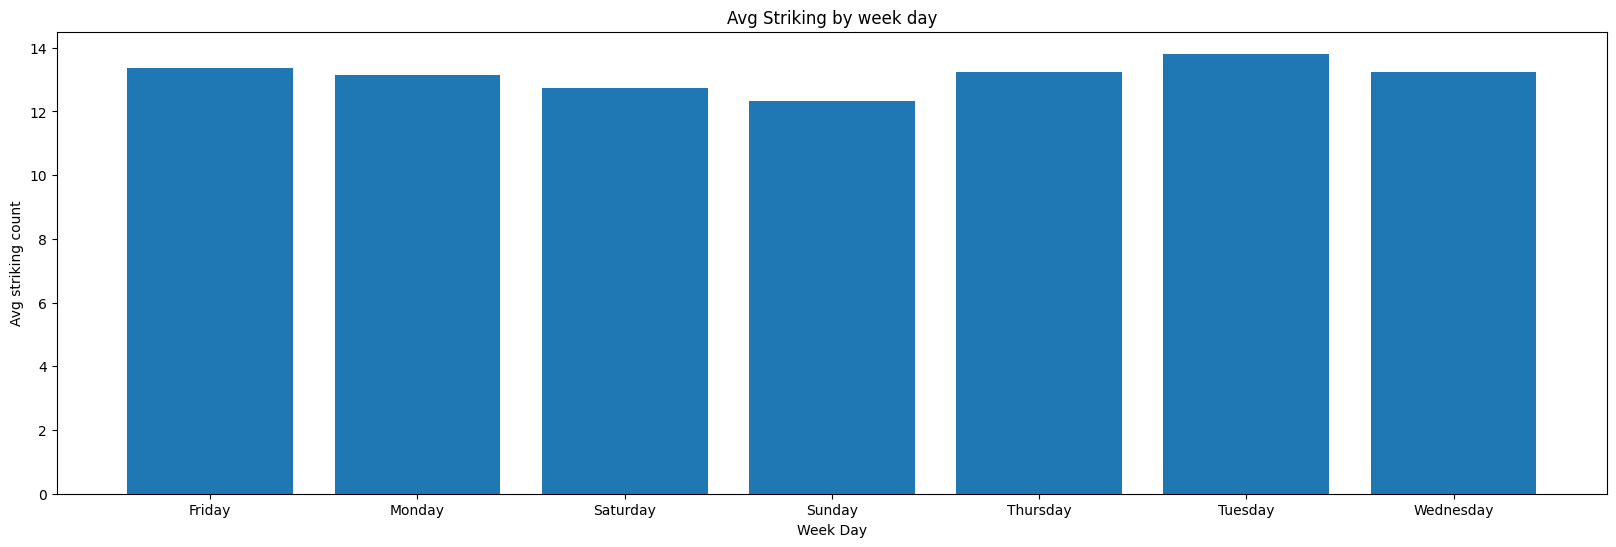

In [34]:
plt.figure(figsize=(20,6))
plt.bar(x=str_by_day["day_name"], height= str_by_day["number_of_strikes"])
plt.title("Avg Striking by week day")
plt.xlabel("Week Day")
plt.ylabel("Avg striking count")
plt.show()

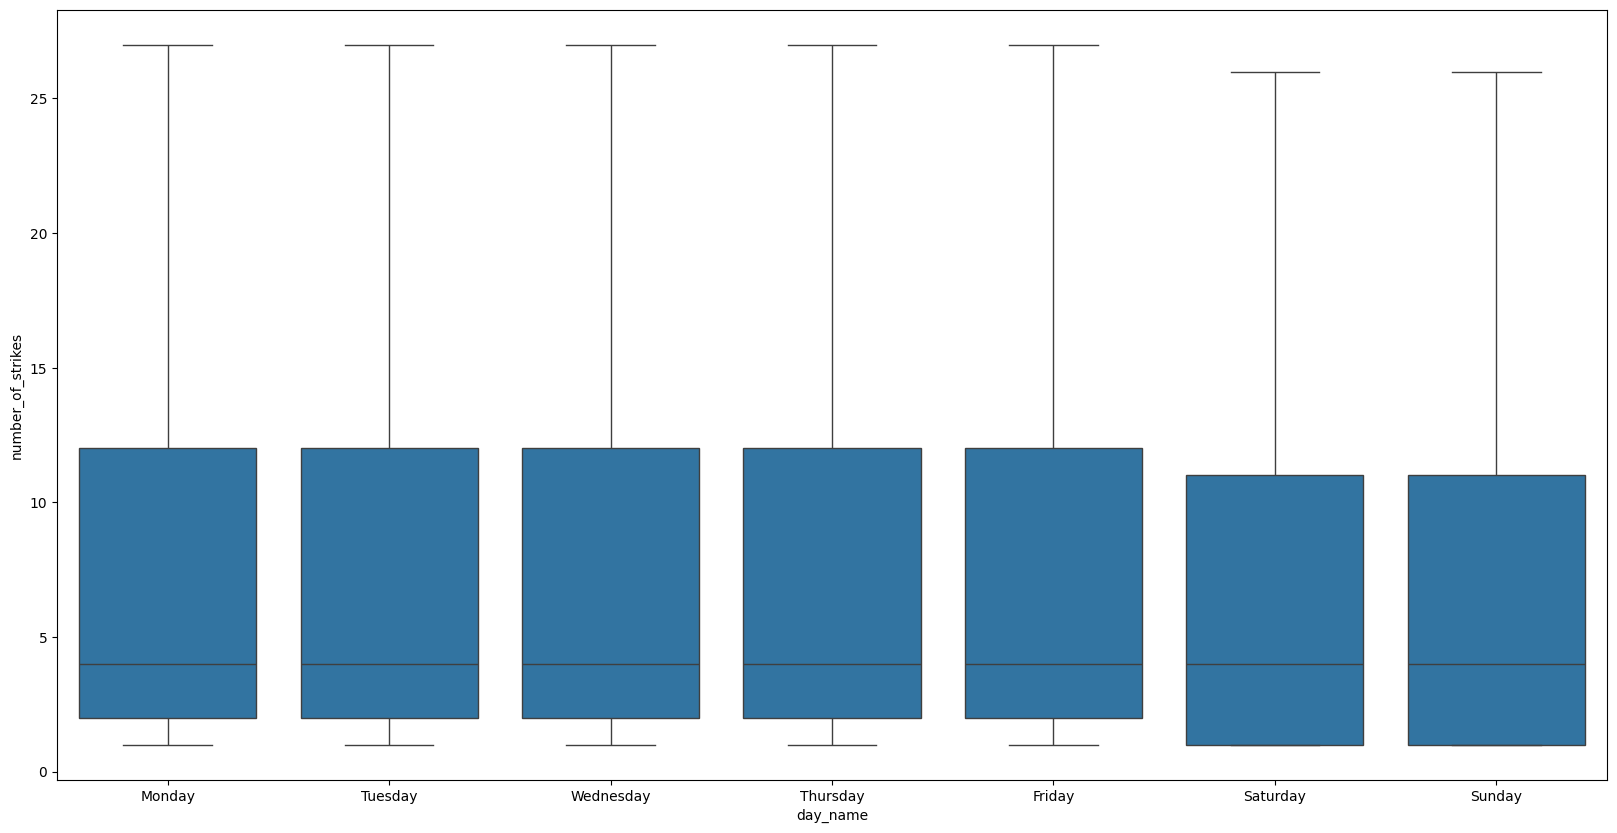

In [35]:
week_order = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(20,10))
box_plot = sns.boxplot( data= eda_df,
                       x = "day_name",
                       y = "number_of_strikes",
                       order = week_order,
                       showfliers = False)



In [36]:
eda_2016_2017 = pd.read_csv("./Raw_data/eda_datasets/eda_structuring/eda_structuring_with_python_dataset2.csv")
eda_2016_2017

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)
...,...,...,...
7077986,2017-12-25,22,POINT(-71.5 37.2)
7077987,2017-12-25,22,POINT(-70.7 37.2)
7077988,2017-12-25,22,POINT(-68.7 38.6)
7077989,2017-12-25,22,POINT(-65.9 39.4)


In [37]:
eda_2016_2017.info()
print("*"*25)
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 162.0+ MB
*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               UInt32        
 4   day_name           object        
dtypes: UInt32(1), datetime64[ns](1), int64(1), object(2)
memory usage: 120.0+ MB


In [38]:
eda_2016_2017["date"] = pd.to_datetime(eda_2016_2017["date"])
eda_2016_2017.info()
print("*"*25)
eda_2016_2017.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 162.0+ MB
*************************


,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)
5,2016-01-05,30,POINT(-76.7 22.3)
6,2016-01-05,34,POINT(-76.8 22.4)
7,2016-01-06,31,POINT(-74.2 25.9)
8,2016-01-06,24,POINT(-76 22.9)
9,2016-01-06,25,POINT(-75.3 22.7)


In [46]:
lightning_2016_2018 = pd.concat([eda_df.drop(["week","day_name"], axis= 1), eda_2016_2017], ignore_index= True)
lightning_2016_2018 = lightning_2016_2018.sort_values(by= "date").reset_index()
lightning_2016_2018= lightning_2016_2018.drop(["index"],axis=1)
lightning_2016_2018.head(15)

,date,number_of_strikes,center_point_geom
0,2016-01-01,6,POINT(-78.2 32)
1,2016-01-01,1,POINT(-78 32.2)
2,2016-01-01,1,POINT(-93.5 29.2)
3,2016-01-01,1,POINT(-77.6 20.3)
4,2016-01-01,1,POINT(-56.2 39.9)
5,2016-01-01,1,POINT(-51.5 43.4)
6,2016-01-01,1,POINT(-74.6 33.7)
7,2016-01-01,1,POINT(-75.8 18.7)
8,2016-01-01,1,POINT(-92.3 29.4)
9,2016-01-01,1,POINT(-76.4 33.2)


In [47]:
lightning_2016_2018.tail(20)

,date,number_of_strikes,center_point_geom
10478983,2018-12-31,2,POINT(-96.3 35.4)
10478984,2018-12-31,2,POINT(-88.4 35.3)
10478985,2018-12-31,2,POINT(-88.6 35.3)
10478986,2018-12-31,2,POINT(-96.4 35.3)
10478987,2018-12-31,2,POINT(-88.2 35.2)
10478988,2018-12-31,2,POINT(-82.7 37.1)
10478989,2018-12-31,2,POINT(-82.9 37.1)
10478990,2018-12-31,2,POINT(-82.9 36.9)
10478991,2018-12-31,2,POINT(-83.1 36.9)
10478992,2018-12-31,2,POINT(-83.5 36.7)


In [48]:
lightning_2016_2018["year"] = lightning_2016_2018["date"].dt.year
lightning_2016_2018["month"] = lightning_2016_2018["date"].dt.month
lightning_2016_2018["month_txt"] = lightning_2016_2018["date"].dt.month_name()

lightning_2016_2018.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2016-01-01,6,POINT(-78.2 32),2016,1,January
1,2016-01-01,1,POINT(-78 32.2),2016,1,January
2,2016-01-01,1,POINT(-93.5 29.2),2016,1,January
3,2016-01-01,1,POINT(-77.6 20.3),2016,1,January
4,2016-01-01,1,POINT(-56.2 39.9),2016,1,January


In [49]:
strikes_by_y = lightning_2016_2018.groupby("year", as_index= False)["number_of_strikes"].sum()
strikes_by_y

,year,number_of_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [52]:
strikes_by_y_m = lightning_2016_2018.groupby(["year","month_txt"],as_index=False).agg(
    number_of_strikes = pd.NamedAgg(column="number_of_strikes", aggfunc=sum)
)
strikes_by_y_m

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_2872\3024763562.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  strikes_by_y_m = lightning_2016_2018.groupby(["year","month_txt"],as_index=False).agg(


,year,month_txt,number_of_strikes
0,2016,April,2636427
1,2016,August,7250442
2,2016,December,316450
3,2016,February,312676
4,2016,January,313595
5,2016,July,10661475
6,2016,June,6647930
7,2016,March,2057527
8,2016,May,5800500
9,2016,November,367853


In [62]:
lightning_comp = strikes_by_y_m.merge(strikes_by_y, on="year")
lightning_comp.rename(columns= {"number_of_strikes_x":"strikes_month","number_of_strikes_y":"strikes_year"},inplace=True)
lightning_comp["month_rate"] = round((lightning_comp["strikes_month"] / lightning_comp["strikes_year"]) *100,2)

lightning_comp

,year,month_txt,strikes_month,strikes_year,month_rate
0,2016,April,2636427,41582229,6.34
1,2016,August,7250442,41582229,17.44
2,2016,December,316450,41582229,0.76
3,2016,February,312676,41582229,0.75
4,2016,January,313595,41582229,0.75
5,2016,July,10661475,41582229,25.64
6,2016,June,6647930,41582229,15.99
7,2016,March,2057527,41582229,4.95
8,2016,May,5800500,41582229,13.95
9,2016,November,367853,41582229,0.88


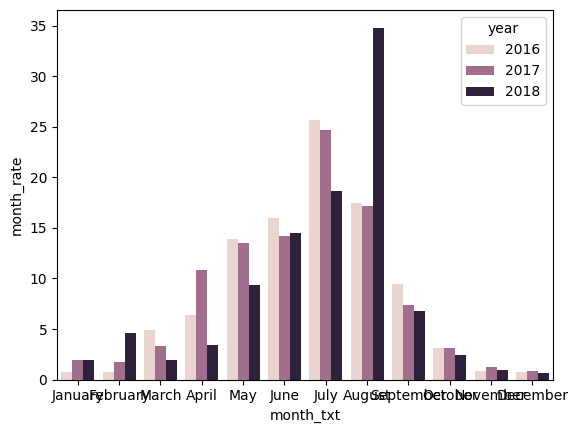

In [66]:
month_order = ["January", "February","March","April", "May","June","July","August","September","October","November","December"]

plt.Figure(figsize=(40,8))

month_comp = sns.barplot(
    data= lightning_comp,
    x = "month_txt",
    y="month_rate",
    hue = "year",
    order = month_order
)

In [ ]:
sns.histplot()